<a href="https://colab.research.google.com/github/berbonilla/CCMACLRL_EXERCISES_COM221ML/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2

Machine Learning pipeline

1. Import the necessary libraries

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

2. Load the dataset


In [107]:
df = pd.read_csv('iris.csv')
df.head()
df.tail()
df.value_counts()
df.drop(columns='Id',inplace=True)

In [108]:
df.value_counts()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
4.9            3.1           1.5            0.1           Iris-setosa        3
5.8            2.7           5.1            1.9           Iris-virginica     2
               4.0           1.2            0.2           Iris-setosa        1
5.9            3.0           4.2            1.5           Iris-versicolor    1
6.2            3.4           5.4            2.3           Iris-virginica     1
                                                                            ..
5.5            2.3           4.0            1.3           Iris-versicolor    1
               2.4           3.7            1.0           Iris-versicolor    1
                             3.8            1.1           Iris-versicolor    1
               2.5           4.0            1.3           Iris-versicolor    1
7.9            3.8           6.4            2.0           Iris-virginica     1
Name: count, Length: 147, dtype: int64

In [109]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [111]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


3. Visualize the dataset

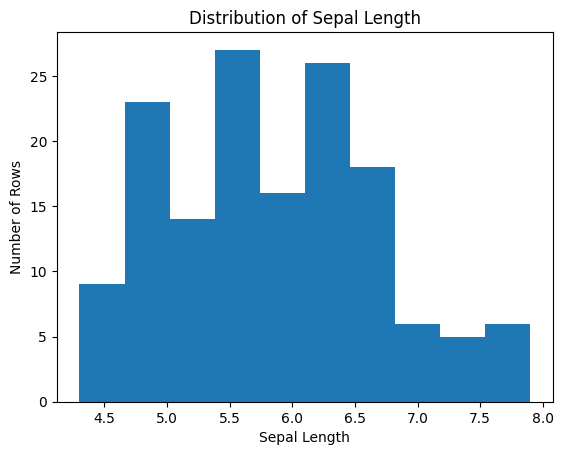

In [112]:
plt.hist(df['SepalLengthCm'])
plt.xlabel('Sepal Length')
plt.ylabel('Number of Rows')
plt.title('Distribution of Sepal Length')
plt.show()

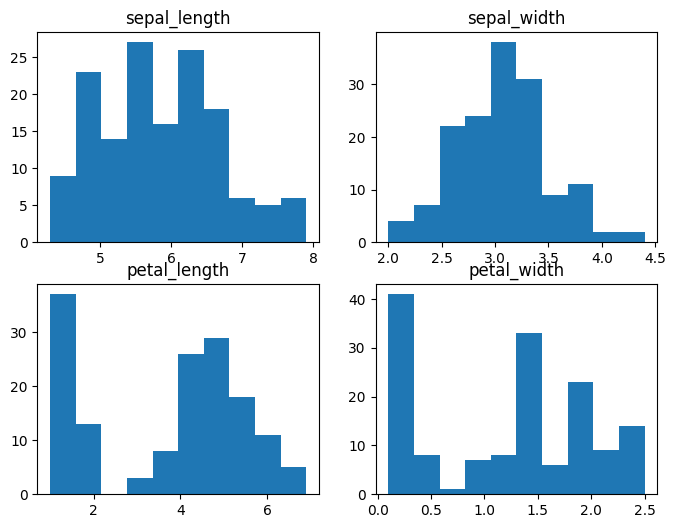

In [113]:
fig, ax = plt.subplots(2,2,figsize=(8,6))

ax[0,0].hist(df['SepalLengthCm'])
ax[0,1].hist(df['SepalWidthCm'])
ax[1,0].hist(df['PetalLengthCm'])
ax[1,1].hist(df['PetalWidthCm'])

ax[0,0].set_title('sepal_length')
ax[0,1].set_title('sepal_width')
ax[1,0].set_title('petal_length')
ax[1,1].set_title('petal_width')

plt.show()

In [114]:
colors = {'Iris-setosa':'red',
          'Iris-virginica':'blue',
          'Iris-versicolor':'green'}

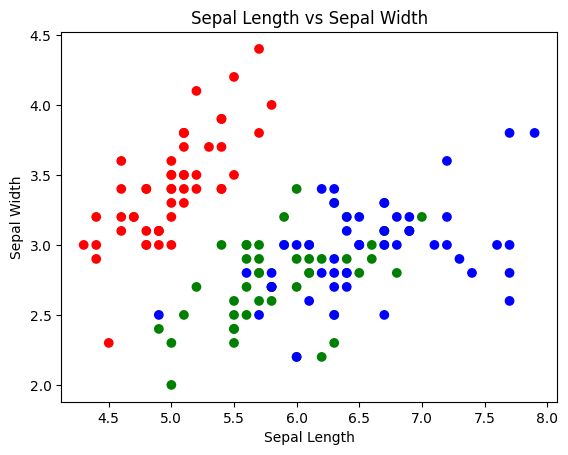

In [115]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],c=df['Species'].map(colors))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.show()

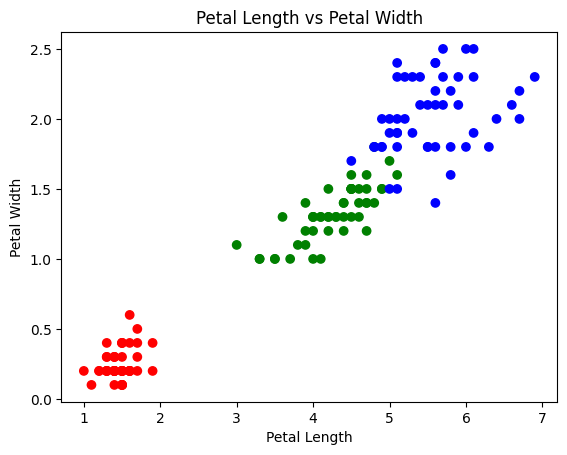

In [116]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],c=df['Species'].map(colors))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.show()

4. Split the dataset into a training set and a testing set

In [117]:
X = df.drop(columns=['Species']).values
y = df['Species'].values

print(X.ndim)
print(X.shape)
# print(X)
print(y.ndim)
print(y.shape)
# print(y)

2
(150, 4)
1
(150,)


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [119]:
X_train

array([[6.2, 2.8, 4.8, 1.8],
       [5.9, 3. , 4.2, 1.5],
       [6.7, 3.3, 5.7, 2.1],
       [7.7, 3.8, 6.7, 2.2],
       [5.4, 3.4, 1.7, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [5. , 3.2, 1.2, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.7, 4.4, 1.5, 0.4],
       [5.2, 3.4, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.7, 1. ],
       [5.1, 2.5, 3. , 1.1],
       [5.9, 3. , 5.1, 1.8],
       [5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.2, 2. ],
       [6.5, 3. , 5.8, 2.2],
       [6.9, 3.1, 4.9, 1.5],
       [4.6, 3.6, 1. , 0.2],
       [6.6, 3. , 4.4, 1.4],
       [4.9, 3.1, 1.5, 0.1],
       [6.7, 3. , 5. , 1.7],
       [6.7, 3. , 5.2, 2.3],
       [5.6, 2.9, 3.6, 1.3],
       [6.3, 3.4, 5.6, 2.4],
       [5.6, 2.7, 4.2, 1.3],
       [6.1, 3. , 4.9, 1.8],
       [6.3, 2.3, 4.4, 1.3],
       [5.8, 2.6, 4. , 1.2],
       [5.7, 3. , 4.2, 1.2],
       [6.9, 3.1, 5.4, 2.1],
       [6.8, 2.8, 4.8, 1.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2

5. Train the model

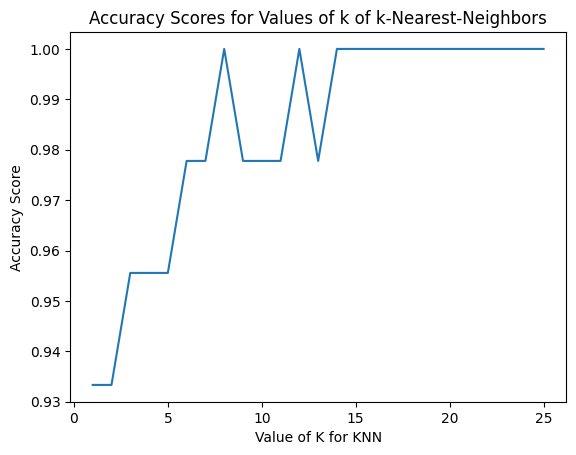

In [120]:
k_range = list(range(1,26))
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)

  y_pred = knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test,y_pred))

plt.plot(k_range,scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

6. Test the model

In [121]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9777777777777777

In [122]:
knn.predict([[5,3,2,2]])

array(['Iris-setosa'], dtype=object)